In [4]:
import anndata as ad
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.decomposition import PCA
from umap import UMAP

sns.set_theme(style="whitegrid")

In [2]:
adata = ad.read_h5ad(filename="out/results/2025-06-18-16-43-30_EVAL_Wang_results.h5ad")

In [11]:
donor_df = adata.obs.groupby("Donor ID").first().reset_index()

# and reorder by order of the keys in h_graph_f0
donor_df = donor_df.set_index("Donor ID").reindex(adata.uns["h_graph_f0"].keys()).reset_index()

C:\Users\timo\AppData\Local\Temp\ipykernel_26164\3701735636.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  donor_df = adata.obs.groupby("Donor ID").first().reset_index()


In [12]:
donor_df

,Donor ID,sample_id,Neurotypical reference,Organism,Brain Region,Sex,Gender,Age at Death,Race (choice=White),Race (choice=Black/ African American),...,all,braaksc,ceradsc,thalsc,Wang,Wang_intermediate,Label,y,train_donor_f0,test_donor_f0
0,H18.30.002,TCGAAGTGTTACACAC-L8TX_200107_01_A10,True,human,Human DFC_all_layers,Male,Male,NaN,Reference,Reference,...,2,NaN,4,NaN,Intermediate,True,Intermediate,1,False,False
1,H19.30.001,TAATCTCGTCGAATTC-L8TX_200130_01_A02,True,human,Human DFC_all_layers,Male,Male,NaN,Reference,Reference,...,10,NaN,4,NaN,Intermediate,True,Intermediate,1,False,False
2,H19.30.002,CACGGGTTCTGCACCT-L8TX_200130_01_C01,True,human,Human DFC_all_layers,Male,Male,NaN,Reference,Reference,...,15,NaN,4,NaN,Intermediate,True,Intermediate,1,False,False
3,H19.33.004,AGTAACCAGAGCGACT-L8TX_210617_01_B12-1113634357,False,human,Human DFC_all_layers,Female,Female,80.0,Checked,Unchecked,...,30,4.0,4,0.0,Intermediate,True,Intermediate,1,False,False
4,H20.33.001,CCATAAGTCGTGTTCC-L8TX_210521_01_G03-1108221667,False,human,Human DFC_all_layers,Male,Male,82.0,Checked,Unchecked,...,62,4.0,3,2.0,Intermediate,True,Intermediate,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78,H21.33.043,GCTGGGTGTGATATAG-L8TX_210916_01_E04-1131593674,False,human,Human DFC_all_layers,Female,Female,95.0,Checked,Unchecked,...,29,2.0,3,4.0,Intermediate,True,Intermediate,1,False,False
79,H21.33.044,AACAACCCACGCACCA-L8TX_210923_01_A08-1131758239,False,human,Human DFC_all_layers,Female,Female,88.0,Checked,Unchecked,...,70,6.0,1,3.0,AD,False,AD,1,False,True
80,H21.33.045,AGTAGCTCAACTCCCT-L8TX_211021_01_D04-1139530068,False,human,Human DFC_all_layers,Female,Female,94.0,Unchecked,Unchecked,...,52,6.0,1,4.0,AD,False,AD,1,False,True
81,H21.33.046,GATGAGGAGCTAGAAT-L8TX_211124_01_D03-1144726144,False,human,Human DFC_all_layers,Male,Male,97.0,Checked,Unchecked,...,71,5.0,2,4.0,AD,False,AD,1,False,True


In [13]:
# make a donor dataframe to align with the sample-level embeddings
adata.uns["h_graph_f0"]

{'H18.30.002': array([[-0.1343692 , -0.07267617,  0.09669699, -0.2383418 ,  0.7177657 ,
          0.22784102,  0.4843548 , -0.47353607, -0.02626395, -0.20612235,
         -0.1552911 , -0.421587  ,  0.02979665,  1.5470881 , -0.24174546,
         -0.0060487 ,  0.6606488 , -0.52516526,  0.42139798,  0.54796916,
          0.9983313 ,  0.32524523,  1.5378704 ,  0.00875502, -0.24336995,
         -0.32784146, -0.14006709,  0.8018664 ,  0.7776997 ,  0.83558   ,
          0.45077166, -0.29956648, -0.05117662,  1.1357541 , -0.21175338,
         -0.27972656,  0.56578374,  0.5582848 , -0.27725023, -0.2680861 ,
         -0.13187528,  0.07783585,  1.0874739 ,  0.1403896 ,  0.1521919 ,
          0.46206084, -0.35378584, -0.04171937,  0.09117021,  0.8514215 ,
         -0.37057295,  0.6735454 ,  0.2517372 , -0.49344656,  0.6822516 ,
         -0.103721  ,  0.51378745, -0.35301325,  0.27585718, -0.3091128 ,
          0.50981575,  0.40232882, -0.20025373, -0.01797867, -0.08082277,
          0.49576908, -0

In [25]:
x = np.vstack([l for l in adata.uns["h_graph_f0"].values()])

In [26]:
x.shape

(83, 128)

c:\Users\timo\Repositories\scAGG\.pixi\envs\default\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


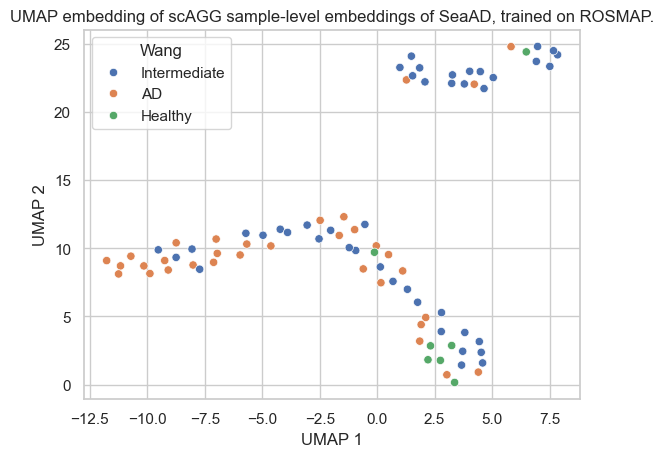

In [130]:
x_pca = PCA(n_components=50).fit_transform(x)
x_umap = UMAP(n_components=2, n_neighbors=8, min_dist=1).fit_transform(x_pca)

sns.scatterplot(
    x=x_umap[:, 0],
    y=x_umap[:, 1],
    hue=donor_df["Wang"],
    hue_order=["Intermediate", "AD", "Healthy"],
    # palette=sns.color_palette("husl", n_colors=len(donor_df)),
)
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.title("UMAP embedding of scAGG sample-level embeddings of SeaAD, trained on ROSMAP.")
plt.show()

In [46]:
donor_df["Wang"].value_counts()

Wang
Intermediate    43
AD              33
Healthy          7
Name: count, dtype: int64

<Axes: >

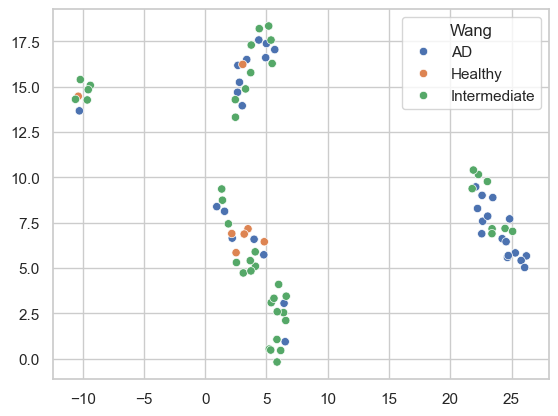